<a href="https://colab.research.google.com/github/AmeerAbdul7/Data-Science-Projects-Task-/blob/main/Abdul_Ameer_91_92_Polynomial_Reg_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color = 'blue'>**Importation of Libraries**</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")


<font color = 'blue'>**Load The Data**</font>

In [ ]:
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

Whole Data Representation in Numerical Format consist of 14 Features and the target variable is PRICE in continuous format, so if we build a model on this data set we use Regression Type supervised Machine Learning Method.

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

<font color = 'blue'>**Data Analysis**</font>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Data set consist of (506, 14) rows and columns,we check the Null values present in data,doing outliers treatment.

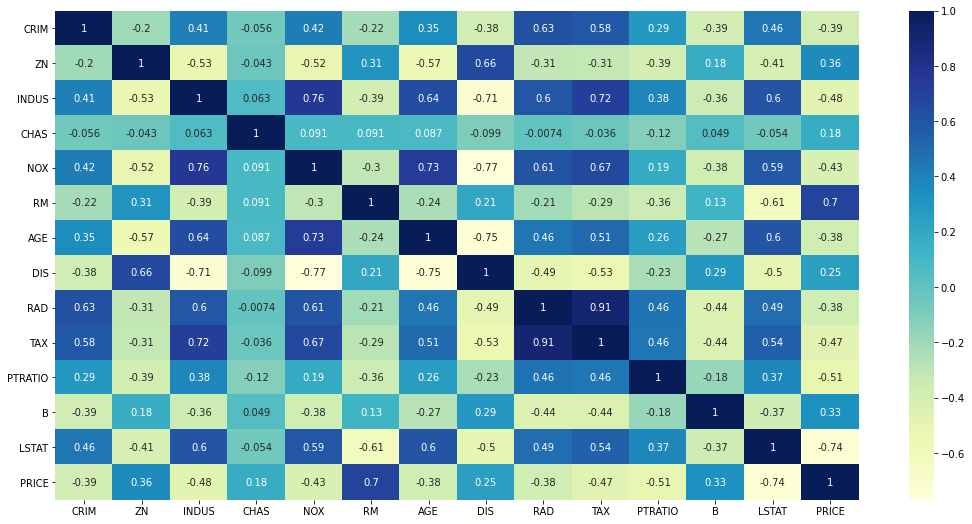

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

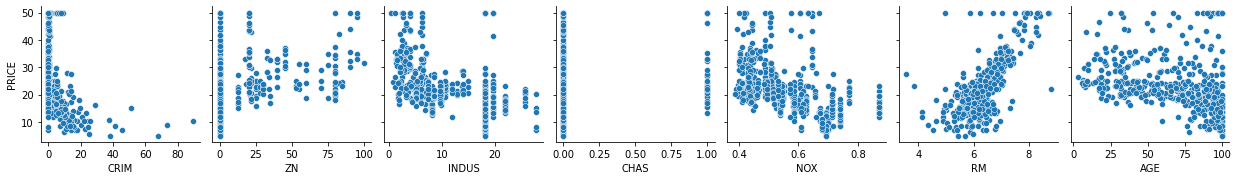

In [ ]:
sns.pairplot(data = df,
            x_vars = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'],
            y_vars = 'PRICE')

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

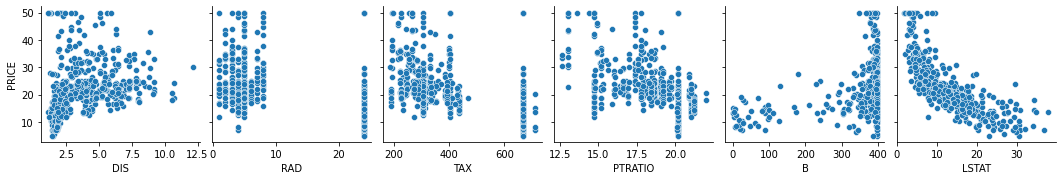

In [ ]:
sns.pairplot(data = df,
            x_vars = ['DIS','RAD','TAX','PTRATIO','B','LSTAT'],
            y_vars = 'PRICE')

I found positive relation on(RM) with (Price) similarly negative relation on (LSTAT) with (Price) as shown in figure.

<font color = 'blue'>**Data Preparation**</font>

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 0)

print(df_train.shape)
print(df_test.shape)

(404, 14)
(102, 14)


In [ ]:
y_train = df_train.pop('PRICE') 

In [ ]:
X_train = df_train

In [ ]:
X_train.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38


In [ ]:
y_train.head(3)

220    26.7
71     21.7
240    22.0
Name: PRICE, dtype: float64

As a part of Data preparation we split data in to train and test, where we train 80% of data and for test assumptions use 20% of data, By using sklearn.model_selection we split data, where randomly row wise. 

<font color='blue'>***Model_1 Making***</font>

In [ ]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('y_intercept: ',model_1.intercept_)

y_intercept:  38.09169492630185


In [ ]:
print('slope: ', model_1.coef_)

slope:  [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


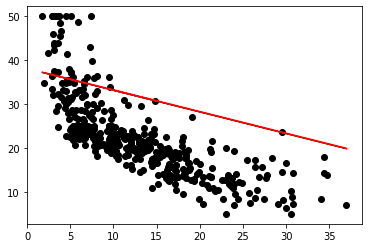

In [ ]:
plt.scatter(X_train.loc[:,'LSTAT'], y_train, color='black')

plt.plot(X_train.loc[:,"LSTAT"],38.091694926302964 + (-4.92792725e-01)* X_train.loc[:,"LSTAT"], 'r')
plt.show()

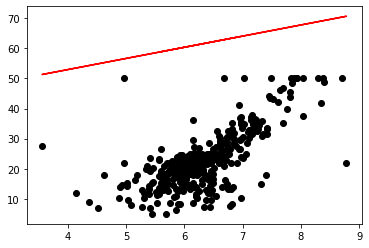

In [ ]:
plt.scatter(X_train.loc[:,"RM"], y_train, color='black')

plt.plot(X_train.loc[:,"RM"],38.091694926302964 + 3.70870901e+00* X_train.loc[:,"RM"], 'r')
plt.show()


Here we draw a scatter plot on train data of features RM,LSTAT which making Positive,negative relation with target variable respectively.


<font color='blue'>**Residual Analysis On Train Data**</font>

In [ ]:
y_train_pred = model_1.predict(X_train)

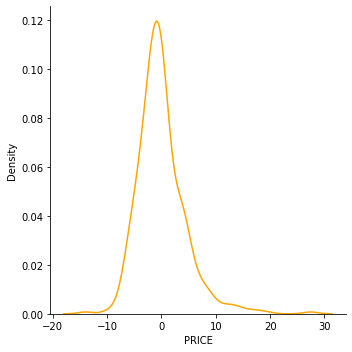

In [ ]:
residual = y_train - y_train_pred
sns.displot(residual, kind = 'kde',color='orange')

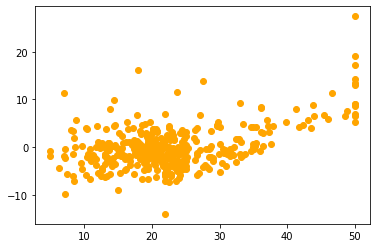

In [ ]:
plt.scatter(y_train, residual, color='orange')

plt.show()

Here we solve the problem in probabilistic way of approach where we have to consider assumptions of Residuals (i.e. Residual analysis) on target variable. 

<font color='blue'>**Prediction on Test Data**</font>

In [ ]:
y_test = df_test.pop('PRICE')
x_test = df_test

In [ ]:
y_test_pred = model_1.predict(x_test)

In [ ]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
329,22.6,24.889638
371,50.0,23.721411
219,23.0,29.364999
403,8.3,12.122386
78,21.2,21.443823
...,...,...
56,24.7,25.442171
455,14.1,15.571783
60,18.7,17.937195
213,28.1,25.305888


<font color='blue'>**Evalution**</font>


In [ ]:
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('MSE: ', metrics.mean_squared_error(y_test, y_test_pred))

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('R2_SCORE', metrics.r2_score(y_test, y_test_pred))

MAE:  3.842909220444498
MSE:  33.44897999767638
RMSE:  5.783509315085122
R2_SCORE 0.5892223849182525


in Evaluation Process we use all Matrices (MAE,MSE,RMSE,R2) where we considering R2_Scr for performance of model

In [ ]:
residual_test = y_test - y_test_pred

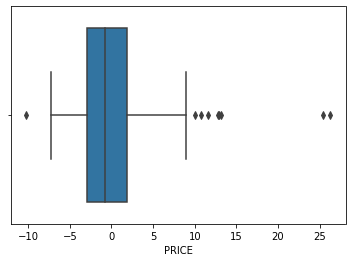

In [ ]:
sns.boxplot(x=residual_test)

In evaluation process we consider R2 _SCORE to find the performance of model here the base model having low performance nearly 59% 

###<font color='green'>***STEP_1***</font>

**Try to perform the exploratory data analysis and observe the relationships between Dependent and Independent variables. If you do a proper analysis, you will find out that RM and LSTAT are having strong relationship with MEDV or Price column. Plot proper graphs to show that relationship.**

<font color = 'blue'>**From the pair plot we know the positive Strong reationship between PRICE with RM & negative strong relationship between PRICE with LSTATS.**</font>

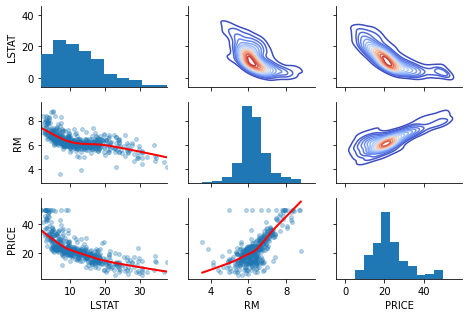

In [ ]:
g = sns.PairGrid(df, vars=['LSTAT','RM','PRICE'], height=1.5, aspect=1.5)

g = g.map_diag(plt.hist)

g = g.map_lower(sns.regplot, lowess=True, scatter_kws={'s': 15, 'alpha':0.3}, 
                line_kws={'color':'red', 'linewidth': 2})
g = g.map_upper(sns.kdeplot, n_levels=15, cmap='coolwarm')
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
plt.show()

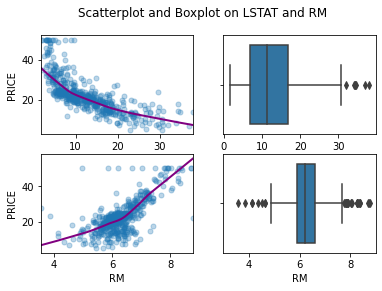

In [ ]:
fig, axes = plt.subplots(2,2)
fig.suptitle("Scatterplot and Boxplot on LSTAT and RM")

sns.regplot(x=df['LSTAT'], y=df['PRICE'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[0, 0])

sns.boxplot(x=df['LSTAT'], ax=axes[0, 1])

sns.regplot(x=df['RM'], y=df['PRICE'], lowess=True, scatter_kws={'s': 25, 'alpha':0.3},
            line_kws={'color':'purple', 'linewidth': 2}, ax=axes[1, 0])

sns.boxplot(x=df['RM'], ax=axes[1, 1]).set(xlim=(3, 9))

plt.show()

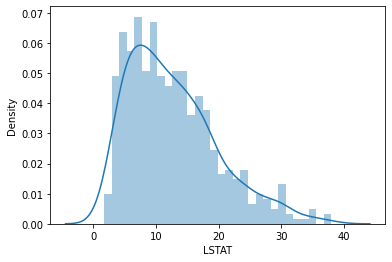

In [ ]:
sns.distplot(df['LSTAT'], bins=30)

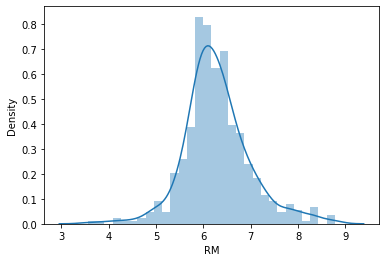

In [ ]:
sns.distplot(df['RM'], bins=30)

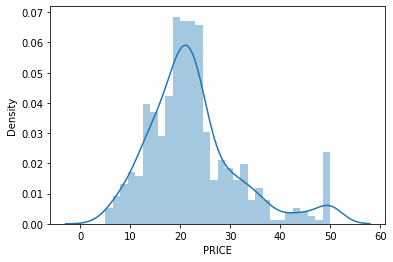

In [ ]:
sns.distplot(df['PRICE'], bins=30)

we check the Normality on every variable by plotting Distribution plot RM follows perfect normal distribution other having some lognormal distribution.

### <font color = 'green'>**STEP_2**</font> 

**Out of all 14 columns use only RM, LSTAT and Price, and fit the model (you can name it model_2) to predict Price. Observe the model_2 error on test data and compare it with the model_1 that is already trained above.**

 <font color = 'blue'>**Normalisation/Standardisation**</font>

In [ ]:
X = pd.DataFrame(df[['LSTAT','RM','PRICE']],columns = ['LSTAT','RM','PRICE'])

In [ ]:

from sklearn.preprocessing import MinMaxScaler
std_data = MinMaxScaler().fit_transform(X)
print(X.shape)

<font color='blue'>***Data Preparation***</font>

In [ ]:
data = pd.DataFrame(std_data,columns = ['LSTAT','RM','PRICE'])

In [ ]:
from sklearn.model_selection import train_test_split

trn_data, tst_data = train_test_split(data, train_size=0.8, \
                                                    random_state=0)

print(trn_data.shape)
print(tst_data.shape)

In [ ]:
y_trn = trn_data.pop('PRICE')
X_trn = trn_data

In [ ]:
print(X_trn.shape, y_trn.shape)

(404, 2) (404,)


<font color='blue'>**Model_2 Making**</font>

In [ ]:
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_trn, y_trn)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('y_intercept: ',model_2.intercept_)

y_intercept:  0.2399511708295881


In [ ]:
print('slope: ',model_2.coef_)

slope:  [-0.52745209  0.59253841]


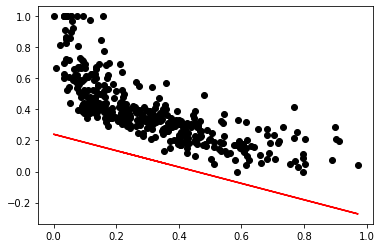

In [ ]:
plt.scatter(X_trn.loc[:,"LSTAT"], y_trn, color='black')

plt.plot(X_trn.loc[:,"LSTAT"],0.2399511708295881 + (-0.52745209) * X_trn.loc[:,"LSTAT"], 'r')
plt.show()

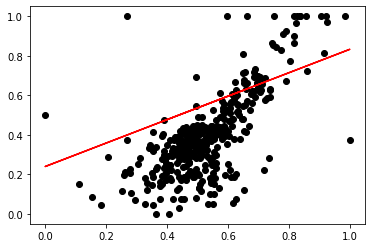

In [ ]:
plt.scatter(X_trn.loc[:,"RM"], y_trn, color='black')

plt.plot(X_trn.loc[:,"RM"],0.2399511708295881 + (0.59253841) * X_trn.loc[:,"RM"], 'r')
plt.show()

<font color='blue'>**Residual Analysis On Train Data**</font>

In [ ]:
y_trn_pred = model_2.predict(X_trn)

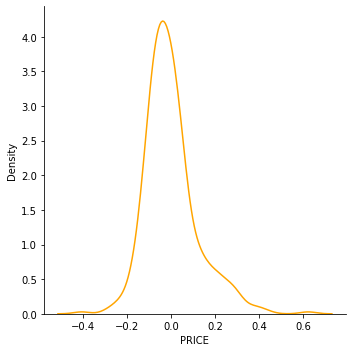

In [ ]:
residual_trn_2 = y_trn - y_trn_pred
sns.displot(residual_trn_2, kind = 'kde',color='orange')

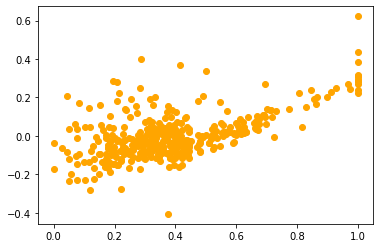

In [ ]:
plt.scatter(y_trn, residual_trn_2, color='orange')
plt.show()

<font color='blue'>**Prediction on Test Data**</font>

In [ ]:
y_tst = tst_data.pop('PRICE')
X_tst = tst_data

In [ ]:
print(X_tst.shape, y_tst.shape)

(102, 2) (102,)


In [ ]:
y_tst_pred = model_2.predict(X_tst)

In [ ]:
temp_df_2 = pd.DataFrame({'Actual': y_tst, 'Predicted': y_tst_pred})
temp_df_2

,Actual,Predicted
329,0.391111,0.473020
371,1.000000,0.427862
219,0.400000,0.431569
403,0.073333,0.180390
78,0.360000,0.388780
...,...,...
56,0.437778,0.501547
455,0.202222,0.337776
60,0.304444,0.321246
213,0.513333,0.448097


In [ ]:
residual_tst_2 = y_tst - y_tst_pred

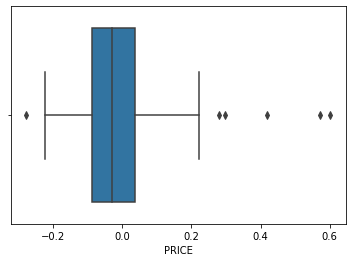

In [ ]:
sns.boxplot(x=residual_tst_2)

<font color='blue'>**Evalution**</font>

In [ ]:
from sklearn import metrics

print('MAE_2: ', metrics.mean_absolute_error(y_tst, y_tst_pred))

print('MSE_2: ', metrics.mean_squared_error(y_tst, y_tst_pred))

print('RMSE_2: ', np.sqrt(metrics.mean_squared_error(y_tst, y_tst_pred)))

print('R2_SCORE_2: ', metrics.r2_score(y_tst, y_tst_pred))

MAE_2:  0.09205432569419021
MSE_2:  0.018460792908039477
RMSE_2:  0.1358705005070618
R2_SCORE_2:  0.5409084827186419


 After making changes we use Linear Regression algorithm for Model-2 making, we considering R2_Scr, as compare to model-1 it is low, i.e. Decreasing performance of model-2. 

<font color='blue'>**Residual Plot Of Train & Test Data**</font>

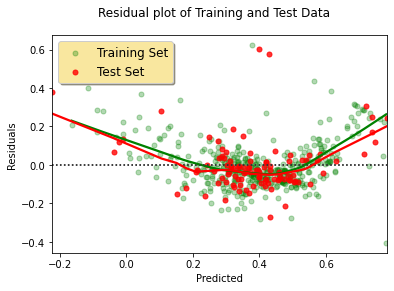

In [ ]:
fig, axes = plt.subplots()
fig.suptitle('Residual plot of Training and Test Data')

# Plot the residuals after fitting a linear model_2
sns.residplot(y_trn_pred, residual_trn_2, lowess=True, color="green", ax=axes, label='Training Set', 
              scatter_kws={'s': 25, 'alpha':0.3})

sns.residplot(y_tst_pred, residual_tst_2, lowess=True, color="red", ax=axes, label='Test Set',
              scatter_kws={'s': 25})

legend = axes.legend(loc='upper left', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#f9e79f')

plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

### <font color = "green">***STEP_3***</font>

 <font color='black'>**Perform polynomial transformations with degree 2, 3, 4, 5, 6 and 7 on RM and LSTAT column, and try to predict the Price. Compare with above models.**</font>

In [ ]:
print(trn_data.shape)
print(tst_data.shape)

(404, 2)
(102, 2)


In [ ]:
print(X_trn.shape, y_trn.shape)
print(X_tst.shape, y_tst.shape)

(404, 2) (404,)
(102, 2) (102,)


<font color='blue'>**polynomial transformation on X_train & X_test**</font>

In [ ]:
def poly(degree):
  from sklearn.preprocessing import PolynomialFeatures

  poly_deg_2 = PolynomialFeatures(degree)

  X_trn_pd2 = poly_deg_2.fit_transform(X_trn)
  X_tst_pd2 = poly_deg_2.fit_transform(X_tst)

  model_pd2 = LinearRegression()

  model_pd2.fit(X_trn_pd2, y_trn)
  model_pd2.fit(X_tst_pd2, y_tst)

  y_trn_pred_2 = model_pd2.predict(X_trn_pd2)
  y_tst_pred_2 = model_pd2.predict(X_tst_pd2)

  curve = np.polyfit(y_trn_pred_2, y_trn, degree)
  poly_crv = np.poly1d(curve)

  new_X = []
  new_y = []
  for i in range(-5,5):
    new_X.append(i+1)
    cal = poly_crv(i+1)
    new_y.append(i+1)

  plt.plot(new_X, new_y, color = 'red')
  plt.scatter(y_trn_pred_2, y_trn, color = 'black')
  plt.show()

  residual_trn_pd2 = y_trn - y_trn_pred_2
  sns.displot(residual_trn_pd2, kind = 'kde', color='Orange')
  plt.show()
  
  plt.scatter(y_trn, residual_trn_pd2, color='Orange')
  plt.show()

  temp_df_pd2 = pd.DataFrame({'Actual': y_tst, 'Predicted': y_tst_pred_2})
  print(temp_df_pd2.head(4))

  residual_tst_pd2 = y_tst - y_tst_pred_2

  sns.boxplot(x=residual_tst_pd2)
  plt.show()

  fig, axes = plt.subplots()
  fig.suptitle('Residual plot of Training and Test set')

  sns.residplot(y_trn_pred_2, residual_trn_pd2, lowess=True, color="green", ax=axes, label='Training Set', 
              scatter_kws={'s': 25, 'alpha':0.3})

  sns.residplot(y_tst_pred_2, residual_tst_pd2, lowess=True, color="red", ax=axes, label='Test Set',
              scatter_kws={'s': 25})

  legend = axes.legend(loc='upper left', shadow=True, fontsize='large')
  legend.get_frame().set_facecolor('#f9e79f')

  plt.xlabel('Predicted')
  plt.ylabel('Residual')
  plt.show()

  from sklearn import metrics

  print('MAE_tst: ', metrics.mean_absolute_error(y_tst, y_tst_pred_2))

  print('MSE_tst: ', metrics.mean_squared_error(y_tst, y_tst_pred_2))

  print('RMSE_tst : ', np.sqrt(metrics.mean_squared_error(y_tst, y_tst_pred_2)))

  print('R2_SCORE_tst : ', metrics.r2_score(y_tst, y_tst_pred_2))

  print('RMSE_trn : ', np.sqrt(metrics.mean_squared_error(y_trn, y_trn_pred_2)))

  print('R2_SCORE_trn : ', metrics.r2_score(y_trn, y_trn_pred_2))



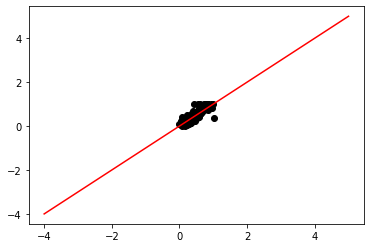

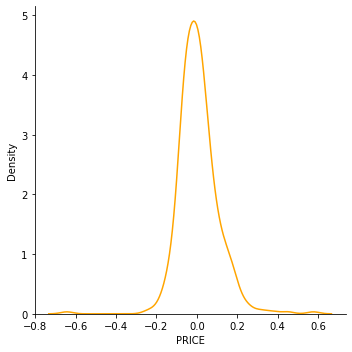

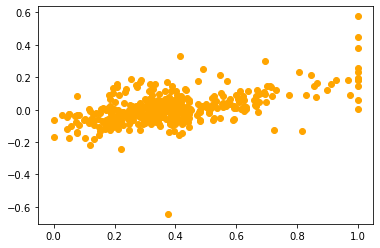

       Actual  Predicted
329  0.391111   0.443339
371  1.000000   0.396564
219  0.400000   0.395360
403  0.073333   0.220222


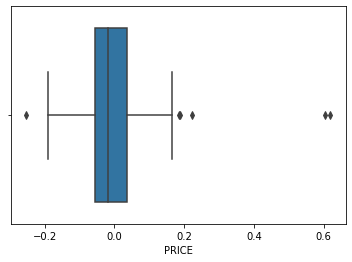

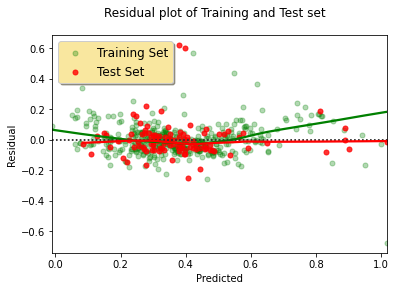

MAE_tst:  0.06960897259051219
MSE_tst:  0.013111830570864933
RMSE_tst :  0.11450690184816342
R2_SCORE_tst :  0.6739289465463297
RMSE_trn :  0.09940890961007275
R2_SCORE_trn :  0.7649701487092309


In [ ]:
poly(2)

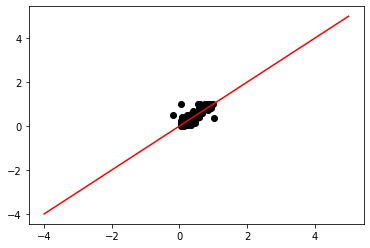

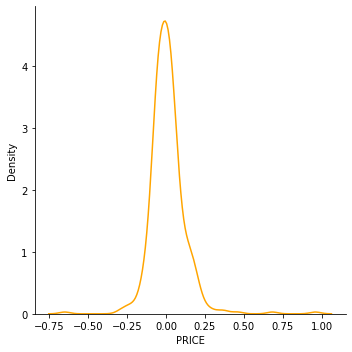

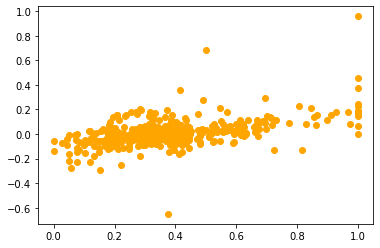

       Actual  Predicted
329  0.391111   0.443429
371  1.000000   0.401209
219  0.400000   0.398123
403  0.073333   0.228838


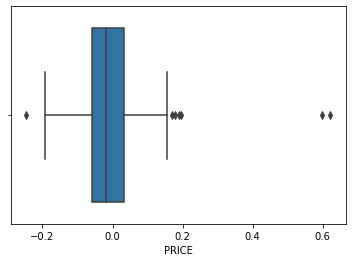

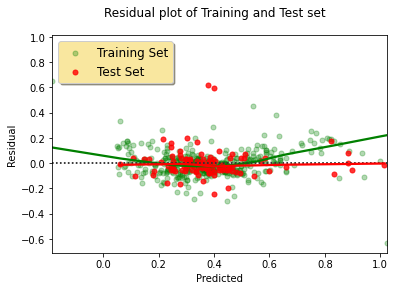

MAE_tst:  0.06915660073525222
MSE_tst:  0.012970765467533138
RMSE_tst :  0.11388926844761599
R2_SCORE_tst :  0.6774370186343841
RMSE_trn :  0.11476416776416247
R2_SCORE_trn :  0.6867543643823181


In [ ]:
poly(3)

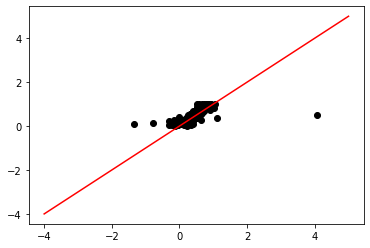

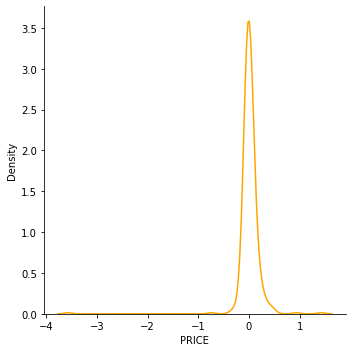

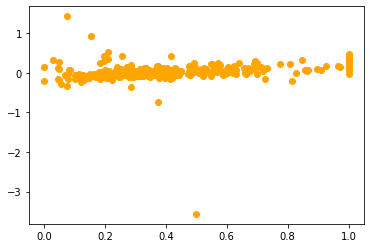

       Actual  Predicted
329  0.391111   0.441709
371  1.000000   0.403303
219  0.400000   0.380791
403  0.073333   0.206945


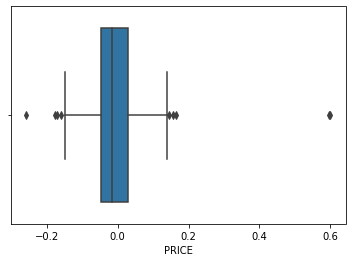

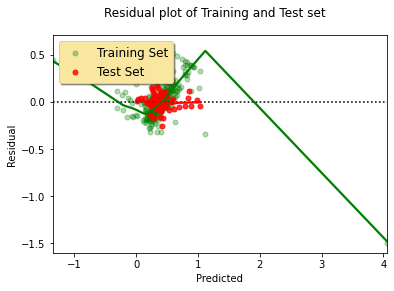

MAE_tst:  0.0646772614953424
MSE_tst:  0.01202745538941832
RMSE_tst :  0.10966975603792652
R2_SCORE_tst :  0.7008956889735076
RMSE_trn :  0.22911971834922917
R2_SCORE_trn :  -0.2485252761708816


In [ ]:
poly(4)

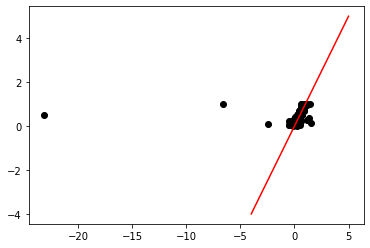

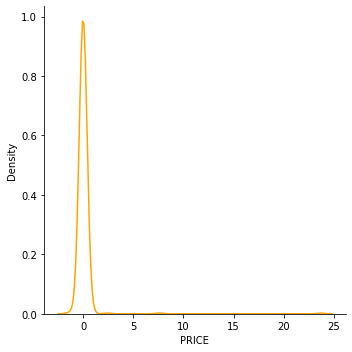

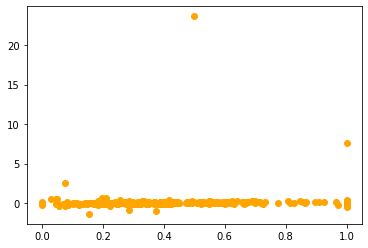

       Actual  Predicted
329  0.391111   0.446529
371  1.000000   0.416597
219  0.400000   0.379152
403  0.073333   0.132231


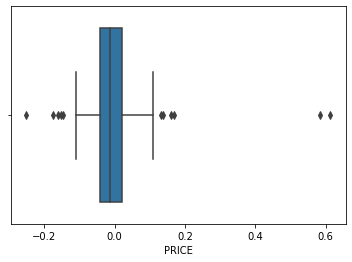

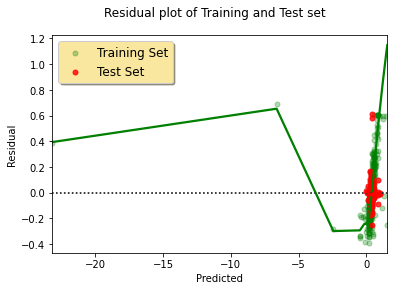

MAE_tst:  0.0589269724156075
MSE_tst:  0.01147889187166597
RMSE_tst :  0.10713959058940803
R2_SCORE_tst :  0.714537619682803
RMSE_trn :  1.2528175190402009
R2_SCORE_trn :  -36.32914485161203


In [ ]:
poly(5)

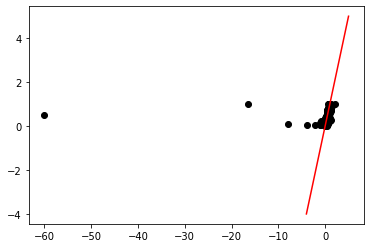

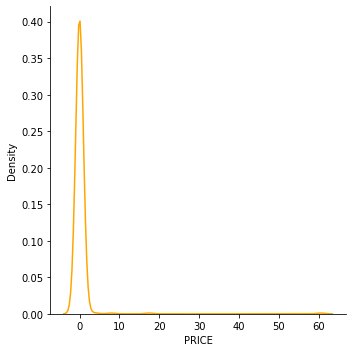

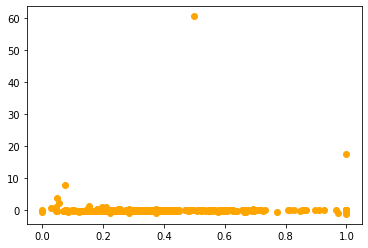

       Actual  Predicted
329  0.391111   0.398438
371  1.000000   0.375000
219  0.400000   0.367188
403  0.073333  -0.035156


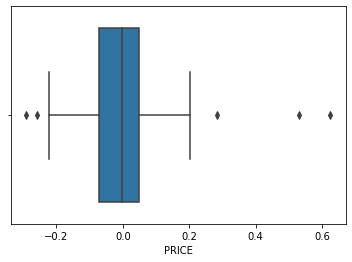

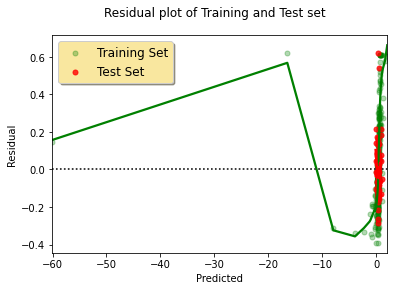

MAE_tst:  0.08581580201525053
MSE_tst:  0.01660030610955561
RMSE_tst :  0.12884217519723737
R2_SCORE_tst :  0.5871759269965054
RMSE_trn :  3.174072163115697
R2_SCORE_trn :  -238.61058422387248


In [ ]:
poly(6)

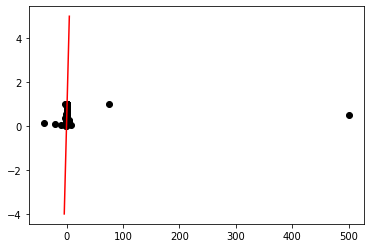

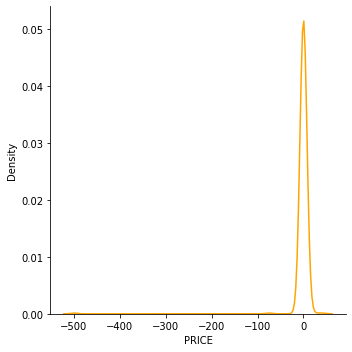

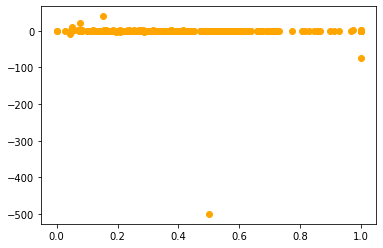

       Actual  Predicted
329  0.391111   0.390625
371  1.000000   0.398438
219  0.400000   0.351562
403  0.073333   0.070312


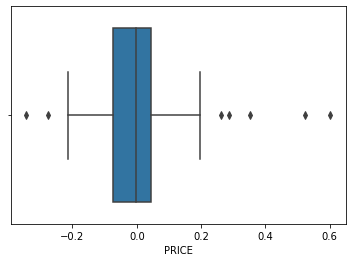

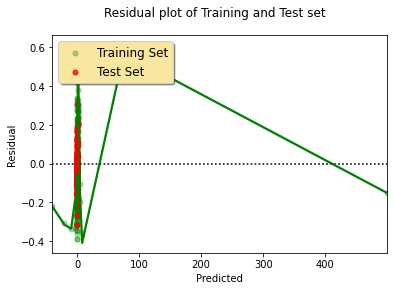

MAE_tst:  0.08787990196078431
MSE_tst:  0.017959223279396634
RMSE_tst :  0.13401202662222758
R2_SCORE_tst :  0.5533817477069303
RMSE_trn :  25.23475665421996
R2_SCORE_trn :  -15144.047773286256


In [ ]:
poly(7)

All the models follows the Residual Analysis  as shown in graphs, If we residual(Errors) relation between train, test data, where if line mounting on horizontal axis which represent zero, as compare to all models  poly_model-2,3 having test data line in horizontal i.e.  There is no error in test data.

### <font color='green'>***STEP_4***</font>

<font color='black'>**Compare all the models (i.e. model_1, model_2, model_pd2, model_pd3, model_pd4, model_pd5, model_pd6 and model_pd7). Plot relavant graphs and tables to compare all these models. As an end note also mention the model that you will prefer.**</font>

In [ ]:
values = {'MAE':[3.842909220444498,0.09205432569419021,0.06960897259051219,0.06915660073525222,0.0646772614953424,0.0589269724156075, 0.08581580201525053, 0.08787990196078431],
          'MSE':[33.44897999767638,0.018460792908039477,0.013111830570864933,0.012970765467533138,0.01202745538941832, 0.01147889187166597,0.01660030610955561, 0.017959223279396634],
          'RMSE':[ 5.783509315085122, 0.1358705005070618,0.11450690184816342,0.11388926844761599,0.10966975603792652,0.10713959058940803,0.12884217519723737,0.13401202662222758],
          'R2_SCORE':[ 0.5892223849182525,0.5409084827186419,0.6739289465463297,0.6774370186343841,0.7008956889735076,0.714537619682803, 0.5871759269965054, 0.5533817477069303],
          'MODEL':['model_1','model_2','model_pd2','model_pd3','model_pd4','model_pd5','model_pd6','model_pd7']}

cmpr_df = pd.DataFrame(values, columns = ['MODEL','MAE','MSE','RMSE','R2_SCORE'])

cmpr_df

,MODEL,MAE,MSE,RMSE,R2_SCORE
0,model_1,3.842909,33.448980,5.783509,0.589222
1,model_2,0.092054,0.018461,0.135871,0.540908
2,model_pd2,0.069609,0.013112,0.114507,0.673929
3,model_pd3,0.069157,0.012971,0.113889,0.677437
4,model_pd4,0.064677,0.012027,0.109670,0.700896
5,model_pd5,0.058927,0.011479,0.107140,0.714538
6,model_pd6,0.085816,0.016600,0.128842,0.587176
7,model_pd7,0.087880,0.017959,0.134012,0.553382


In [ ]:
cmpr_df['MAE'].max()

3.842909220444498

In [ ]:
cmpr_df['MAE'].min()

0.0589269724156075

In [ ]:
cmpr_df['MSE'].max()

33.44897999767638

In [ ]:
cmpr_df['MSE'].min()

0.01147889187166597

In [ ]:
cmpr_df['RMSE'].max()

5.783509315085122

In [ ]:
cmpr_df['RMSE'].min()

0.10713959058940803

In [ ]:
cmpr_df['R2_SCORE'].max()

0.714537619682803

In [ ]:
cmpr_df['R2_SCORE'].min()

0.5409084827186419

In [ ]:
cmpr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MAE,8.0,0.546379,1.332053,0.058927,0.068037,0.077712,0.088924,3.842909
MSE,8.0,4.193949,11.820818,0.011479,0.012735,0.014856,0.018085,33.448980
RMSE,8.0,0.828430,2.002185,0.107140,0.112834,0.121675,0.134477,5.783509
R2_SCORE,8.0,0.629686,0.069340,0.540908,0.578727,0.631576,0.683302,0.714538


If we observe performance of models poly_model-2 having high r2_score as compare to poly_model-3 but there is no consistence in train, test data sets if we observe poly_model-3 having consistence but low performance of model.

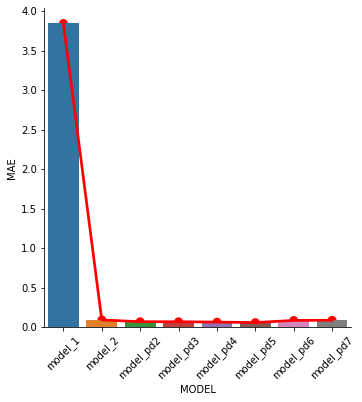

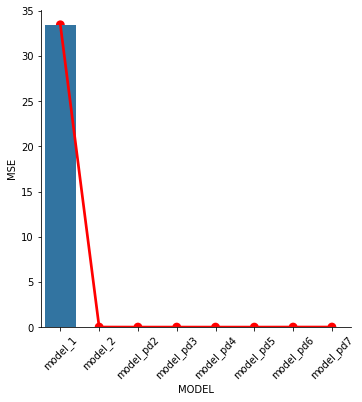

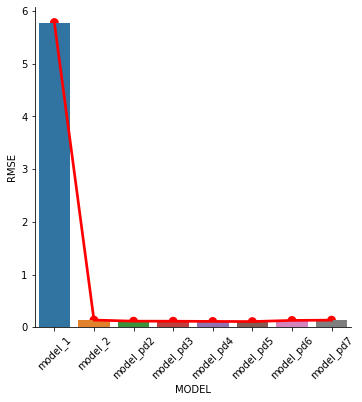

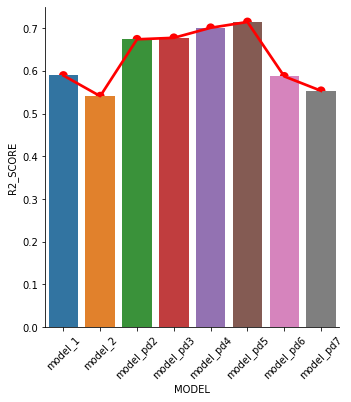

In [ ]:
columns = ['MAE','MSE','RMSE','R2_SCORE']

for i in columns:
  sns.catplot(x='MODEL', y=i, kind="point", color = 'red', data=cmpr_df)
  sns.barplot(x='MODEL', y=i, data=cmpr_df)
  plt.xticks(rotation=45)
  plt.show()



If we observe rest of models there is no consistence of data (for away the performance in train, test) and  having large errors in models I.e. large overfitting issues, we cant make best models from that, there is high performance in test data but that not useful, if it is maintaining consistence and  increase the performance then we can say that is bet model.

<font color='blue'>**Conclusion**</font>

**So we have poly_model-3 is best model to predict house price.**